<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/unluckid/model/blob/main/tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# 설정

In [ ]:
import gdown
import numpy as np
import cv2
import numpy as np
import os
import shutil

file_id = '1e-ovYZtdJVMLnaK_469TWhSXSdHoLHQx'
download_url = f'https://drive.google.com/uc?id={file_id}'

file_id1 = '1UEKiSEIxx_xWLVJfuI8HwkL8TudHv8CT'
download_url1 = f'https://drive.google.com/uc?id={file_id1}'
gdown.download(download_url, '/content/dataset.zip', quiet=False)
gdown.download(download_url1, '/content/test.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1e-ovYZtdJVMLnaK_469TWhSXSdHoLHQx
From (redirected): https://drive.google.com/uc?id=1e-ovYZtdJVMLnaK_469TWhSXSdHoLHQx&confirm=t&uuid=50bfb792-7e7c-425e-9d43-b4deec67242e
To: /content/dataset.zip
100%|██████████| 220M/220M [00:02<00:00, 90.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1UEKiSEIxx_xWLVJfuI8HwkL8TudHv8CT
From (redirected): https://drive.google.com/uc?id=1UEKiSEIxx_xWLVJfuI8HwkL8TudHv8CT&confirm=t&uuid=0030bbbc-4d60-4f35-b8a8-eff9088efd45
To: /content/test.zip
100%|██████████| 32.0M/32.0M [00:00<00:00, 88.2MB/s]


'/content/test.zip'

In [ ]:
import zipfile


zip_file_path = '/content/dataset.zip'
extract_path = '/content/'
zip_file_path1 = '/content/test.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
with zipfile.ZipFile(zip_file_path1, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"압축이 {extract_path}에 해제되었습니다.")

압축이 /content/에 해제되었습니다.


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier,BaggingClassifier
from tensorflow.keras.applications import VGG16, Xception , InceptionV3
from tensorflow.keras.models import load_model, Model
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score


In [ ]:
train_dir = "datasets/train"
test_dir = "tset"
val_dir = "datasets/val"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
)


val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    val_dir,  #
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 10), dtype=tf.float32)
    )
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 10), dtype=tf.float32)
    )
)
test_dataset = tf.data.Dataset.from_generator(
    lambda: test_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 10), dtype=tf.float32)
    )
)
train_dataset = train_dataset.repeat()  # 학습 데이터 무한 반복
val_dataset = val_dataset.repeat()      # 검증 데이터 무한 반복


Found 2625 images belonging to 10 classes.
Found 476 images belonging to 10 classes.
Found 476 images belonging to 10 classes.


In [ ]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


x = layers.Flatten()(vgg16_base.output)


x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.6)(x)  # Dropout 추가
x = layers.Dense(10, activation='softmax')(x)

#  모델 정의
model = models.Model(inputs=vgg16_base.input, outputs=x)


for layer in vgg16_base.layers:
    layer.trainable = False
#  컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,565,386 (105.15 MB)

 Trainable params: 12,850,698 (49.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# steps_per_epoch, validation_steps 설정
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

In [ ]:
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

# 모델 저장
model.save('vgg16.keras')

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 54s 472ms/step - accuracy: 0.1675 - loss: 4.3554 - val_accuracy: 0.5112 - val_loss: 1.7411
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 55s 641ms/step - accuracy: 0.3395 - loss: 1.8176 - val_accuracy: 0.6059 - val_loss: 1.4947
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 43s 535ms/step - accuracy: 0.3838 - loss: 1.6340 - val_accuracy: 0.7432 - val_loss: 1.1851
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 39s 484ms/step - accuracy: 0.4441 - loss: 1.4535 - val_accuracy: 0.8266 - val_loss: 0.9811
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 446ms/step - accuracy: 0.4516 - loss: 1.4288 - val_accuracy: 0.8198 - val_loss: 0.9944
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 37s 457ms/step - accuracy: 0.4696 - loss: 1.3582 - val_accuracy: 0.7185 - val_loss: 1.0361
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 40s 489ms/step - accuracy: 0.4566 - loss: 1.3789 - val_accuracy: 0.6757 - val_loss: 1.0274
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 37s 454ms/step - accuracy: 0.4933 - loss: 1.3059 - val_accu

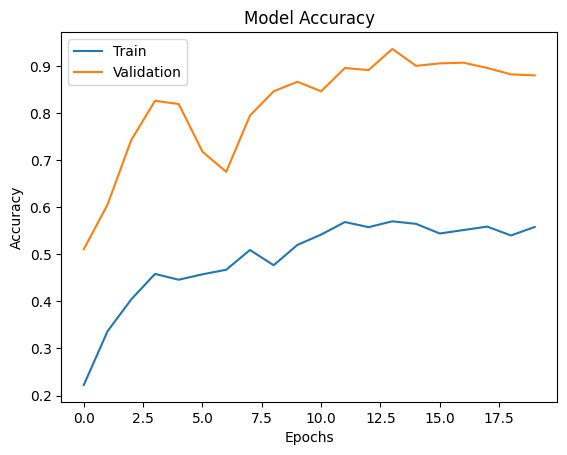

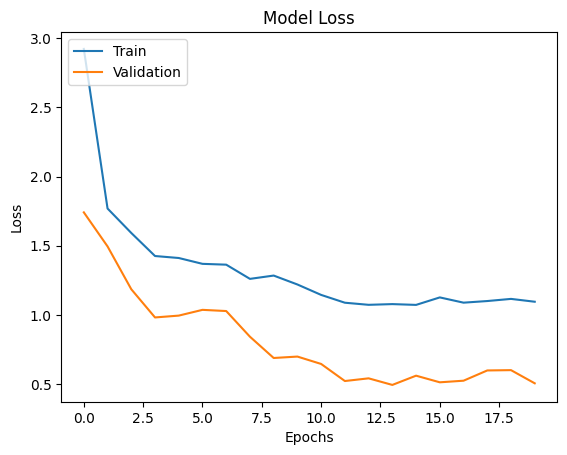

In [ ]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step


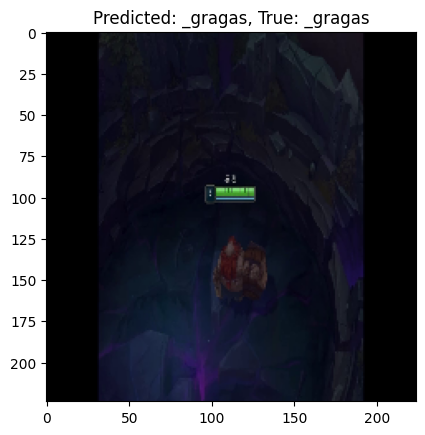

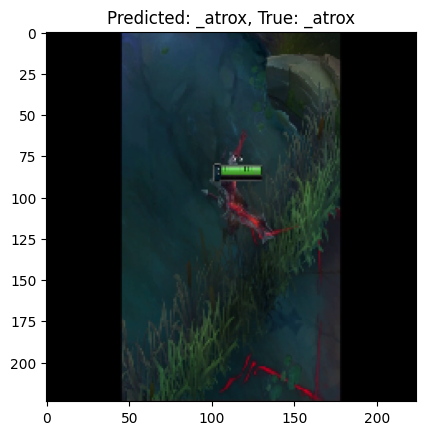

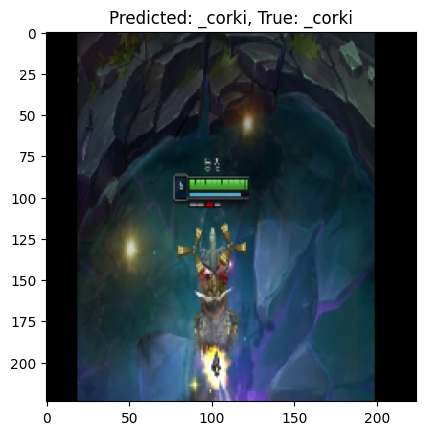

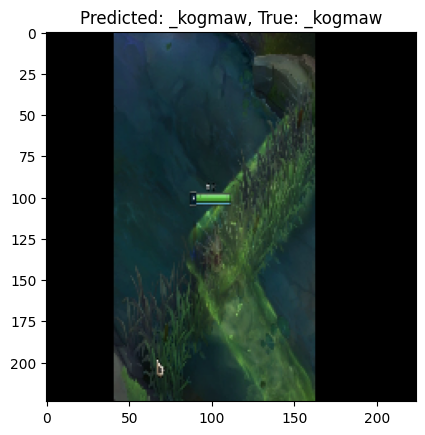

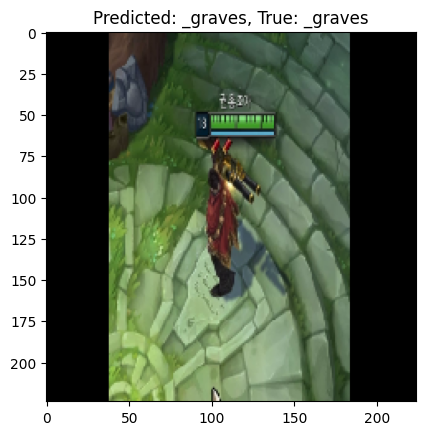

In [ ]:

class_names = list(train_generator.class_indices.keys())

sample_images, sample_labels = next(val_generator)

predictions = model.predict(sample_images)

predicted_class = np.argmax(predictions, axis=1)


for i in range(5):
    plt.imshow(sample_images[i])
    true_class = np.argmax(sample_labels[i])
    plt.title(f"Predicted: {class_names[predicted_class[i]]}, True: {class_names[true_class]}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


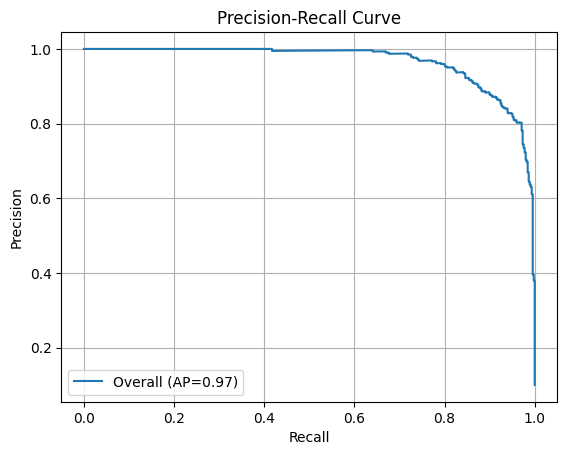

In [ ]:



y_true = []
y_scores = []

for i in range(validation_steps):
    x_batch, y_batch = next(test_generator)
    y_true.extend(np.argmax(y_batch, axis=1))
    y_scores.extend(model.predict(x_batch))

y_true = np.array(y_true)
y_scores = np.array(y_scores)


y_true_binary = np.zeros_like(y_scores)
for i in range(len(y_true)):
    y_true_binary[i, y_true[i]] = 1

precision, recall, _ = precision_recall_curve(y_true_binary.ravel(), y_scores.ravel())
average_precision = average_precision_score(y_true_binary.ravel(), y_scores.ravel())


plt.plot(recall, precision, label=f'Overall (AP={average_precision:.2f})')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.grid()
plt.show()
